# Demo for burst detections

This notebook aims to generate a signal and many epochs with known beta burst components and to apply four detection methods: THS, THD HMM and TFE.



# User definitions


In [ ]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/00_JMAO/11_PROJECTS/Project_BetaBurst/Code/"


# Import libraries

In [ ]:
# -------------------------------
# Install hmmlearn
%%capture
! pip install hmmlearn


In [ ]:
# -------------------------------
# Install mne
%%capture
! pip install mne


In [ ]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxBurstsDetection as TBD
import ToolboxBurstsDetectionPerformanceFunctions as TBD2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# One signal

### Generate signal

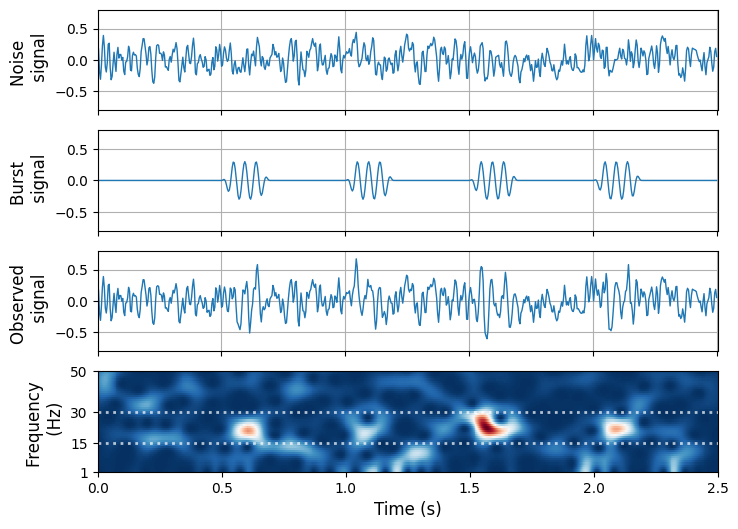

In [ ]:
# -------------------------------
# Set sampling frequency
fs                  = 256

# -------------------------------
# Set signal duration
SignalDuration      = 2.5

# -------------------------------
# Generate a signal with burts components
BurstsParams        = {}
BurstsParams['fre'] = 22        # Hz
BurstsParams['amp'] = 0.3       # units
BurstsParams['pha'] = np.pi/3   # rad
BurstsParams['dur'] = 0.200     # s
xraw, t, xburst     = TBD.GenerateSignalWithBurstsV0( fs, SignalDuration, BurstsParams, True )



In [ ]:
# -------------------------------
# Print signal information
print( type(xraw) )
print( xraw.shape )


<class 'numpy.ndarray'>
(640,)


### Set parameters

In [ ]:
# -------------------------------
# Define frequency band
FrequencyBand   = [15, 29]  # Hz

# -------------------------------
# Minimum burst/segment duration (i.e., eliminate bursts/segments with duration lower than this)
MinSegDur      = 80 # ms


### THS method

There are:                4 bursts 
Burst rate:               1.6 burst/s 
 
Duration:                 [0.09765625, 0.0859375, 0.1640625, 0.10546875] s
Peak amplitude:           [0.4089849547877058, 0.2629230762735386, 0.46242719497413043, 0.3832791231566153] u
 
Peak frequency:           [21.0, 20.0, 21.0, 22.0] Hz
Peak frequency magnitude: [0.03537865353850269, 0.02332671844259759, 0.0555164749993145, 0.03738972055520491]
 


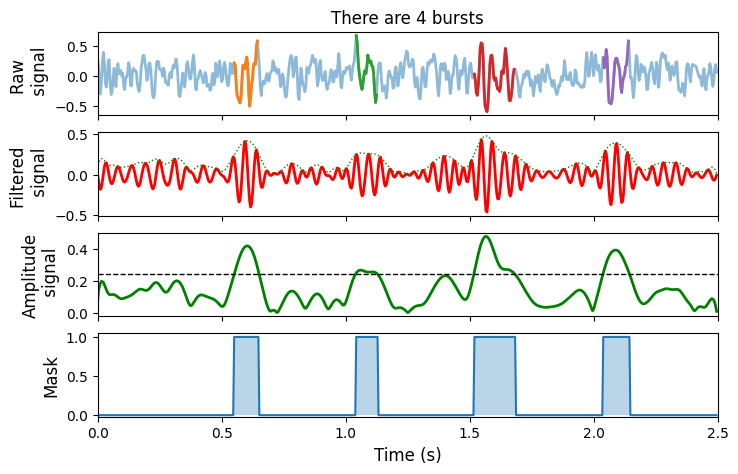

In [ ]:
# -------------------------------
# Set parameters

# Factor-of-the-median threshold
THRFOM                 = 2

# -------------------------------
# Burst detection using the THS method
maskTHS                = TBD.BurstDetection_THS(xraw, fs, FrequencyBand, THRFOM, MinSegDur, 'Amplitude', True)

# -------------------------------
# Compute characteristics
charsTHS, rateTHS, _, infoeventsTHS = TBD.ComputeBurstCharacteristicsFromMask(maskTHS, xraw, fs, FrequencyBand, False, True )


### THD method

There are:                4 bursts 
Burst rate:               1.6 burst/s 
 
Duration:                 [0.1171875, 0.125, 0.19921875, 0.12890625] s
Peak amplitude:           [0.4089849547877058, 0.2629230762735386, 0.46242719497413043, 0.3832791231566153] u
 
Peak frequency:           [21.0, 21.0, 22.0, 22.0] Hz
Peak frequency magnitude: [0.03955960004304301, 0.030982315649027384, 0.06194876264349005, 0.040042357359119235]
 


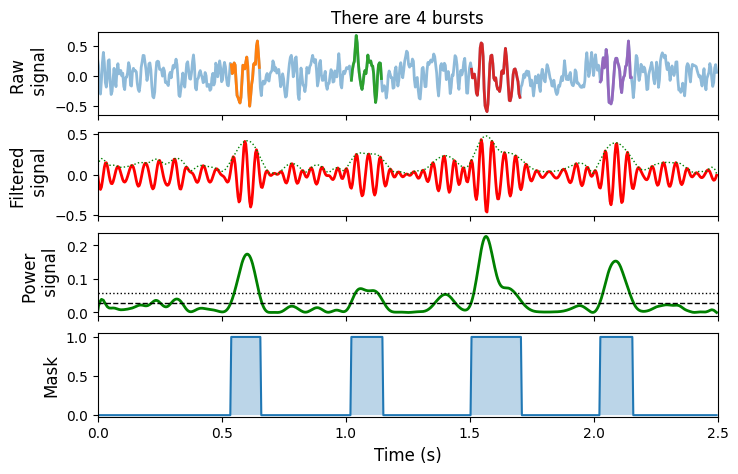

In [ ]:
# -------------------------------
# Set parameters

# Low and high factor-of-the-median thresholds
DualTHRFOM             = [ 2, 4 ]

# -------------------------------
# Burst detection using the THD method
maskTHD                = TBD.BurstDetection_THD(xraw, fs, FrequencyBand, DualTHRFOM, MinSegDur, 'Power', True)

# -------------------------------
# Compute characteristics
charsTHD, rateTHD, _, infoeventsTHD = TBD.ComputeBurstCharacteristicsFromMask(maskTHD, xraw, fs, FrequencyBand, False, True )


### HMM method

There are:                5 bursts 
Burst rate:               2.0 burst/s 
 
Duration:                 [0.12109375, 0.1328125, 0.08203125, 0.20703125, 0.1328125] s
Peak amplitude:           [0.4089849547877058, 0.2629230762735386, 0.2264265807409537, 0.46242719497413043, 0.3832791231566153] u
 
Peak frequency:           [21.0, 21.0, 23.0, 22.0, 22.0] Hz
Peak frequency magnitude: [0.0397936074079976, 0.031273852044249505, 0.016453663717720488, 0.06445176677835457, 0.04112200359513626]
 


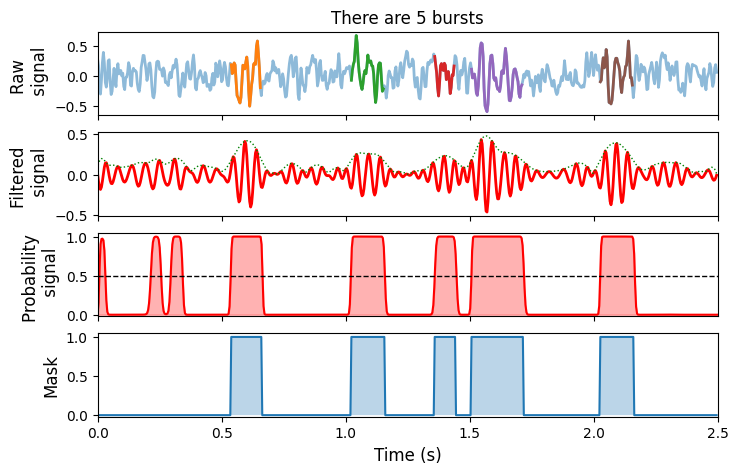

In [ ]:
# -------------------------------
# Set parameters

# Probability threshold
THRProb                = 0.5

# -------------------------------
# Burst detection using the HMM method
maskHMM                = TBD.BurstDetection_HMM(xraw, fs, FrequencyBand, THRProb, MinSegDur, 'Amplitude', True, True)

# -------------------------------
# Compute characteristics
charsHMM, rateHMM, _, infoeventsHMM = TBD.ComputeBurstCharacteristicsFromMask(maskHMM, xraw, fs, FrequencyBand, False, True )


### TFE method

There are:                4 bursts 
Burst rate:               1.6 burst/s 
 
Duration:                 [0.10546875, 0.1015625, 0.1015625, 0.11328125] s
Peak amplitude:           [0.4089849547877058, 0.2629230762735386, 0.46242719497413043, 0.3832791231566153] u
 
Peak frequency:           [21.0, 20.0, 22.0, 22.0] Hz
Peak frequency magnitude: [0.0361950432182238, 0.02505818377170653, 0.041913727060146996, 0.03800919730496571]
 


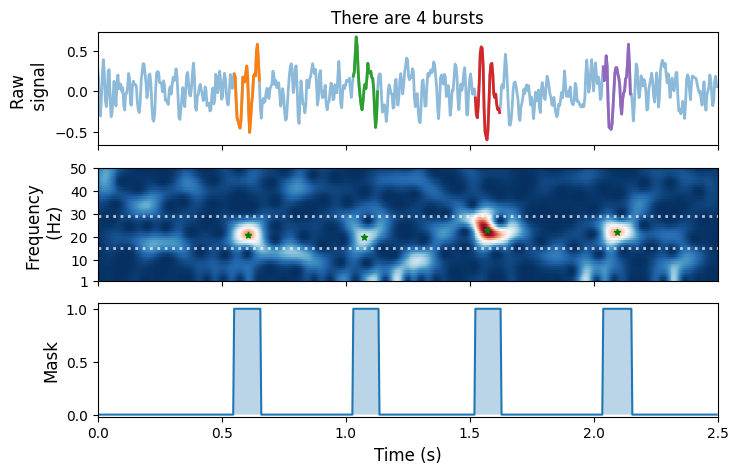

In [ ]:
# -------------------------------
# Set parameters

# Factor-of-the-median threshold
THRFOM                 = 5

# Fequency values (Hz) over which to calculate the spectrogram
freqs                  = np.array( range(1, 50 + 1) )

# -------------------------------
# Burst detection using the TFE method
maskTFE, InfoEventsTFE = TBD.BurstDetection_TFE(xraw, fs, FrequencyBand, THRFOM, MinSegDur, freqs, True )

# -------------------------------
# Compute characteristics from mask
charsTFE, rateTFE, _, infoeventsTFE = TBD.ComputeBurstCharacteristicsFromMask(maskTFE, xraw, fs, FrequencyBand, False, True )


### Compare methods

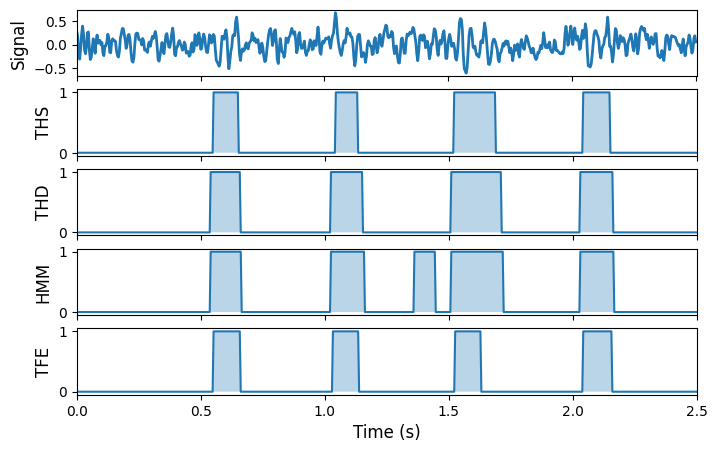

In [ ]:
# Plot
fig, axs = plt.subplots(5, 1, figsize=(8,5), dpi=100)

axs[0].plot( t, xraw  , label='Signal', linewidth=2 )
axs[0].set_xlim(t[0], t[-1]+1/fs)
axs[0].set_ylabel('Signal', size='large')

axs[1].plot(t, maskTHS)
axs[1].fill_between(x=t, y1=maskTHS, alpha=0.3)
axs[1].set_ylabel('THS', size='large')
axs[1].set_xlim(t[0], t[-1])

axs[2].plot(t, maskTHD)
axs[2].fill_between(x=t, y1=maskTHD, alpha=0.3)
axs[2].set_ylabel('THD', size='large')
axs[2].set_xlim(t[0], t[-1])

axs[3].plot(t, maskHMM)
axs[3].fill_between(x=t, y1=maskHMM, alpha=0.3)
axs[3].set_ylabel('HMM', size='large')
axs[3].set_xlim(t[0], t[-1])

axs[4].plot(t, maskTFE)
axs[4].fill_between(x=t, y1=maskTFE, alpha=0.3)
axs[4].set_ylabel('TFE', size='large')
axs[4].set_xlabel('Time (s)', size='large')
axs[4].set_xlim(t[0], t[-1])

for ax in axs.flat: ax.label_outer()

plt.show()

# Many epochs

### Generate epochs

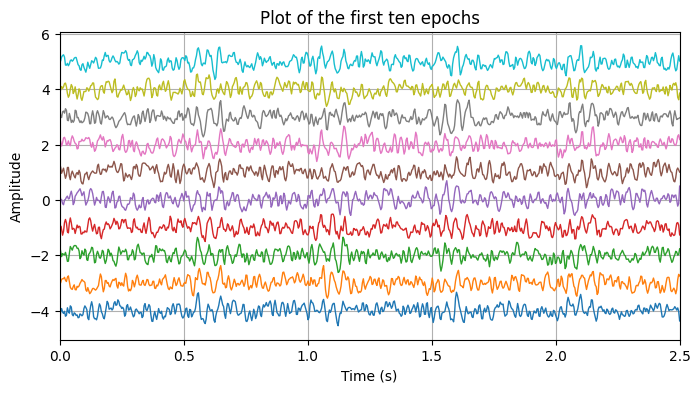

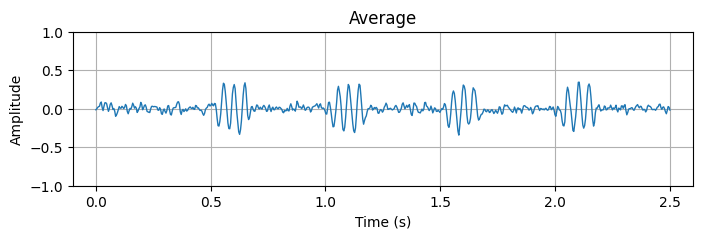

In [ ]:
# -------------------------------
# Set sampling frequency
fs                = 256

# -------------------------------
# Set signal duration
SignalDuration    = 2.5

# -------------------------------
# Set number of epochs
Nepochs           = 25

# -------------------------------
# Set burst parameters
BurstsParams             = {}
BurstsParams['fre']      = 22        # Hz
BurstsParams['amp']      = 0.3       # units
BurstsParams['pha']      = 0*np.pi/3 # rad
BurstsParams['dur']      = 0.200     # s

# -------------------------------
# Generate epochs with burt components
X, t              = TBD.GenerateEpochsWithBurstsV0( fs, SignalDuration, Nepochs, BurstsParams, True )

# -------------------------------
# Info of injected burts
BurstsParams['SignalDuration']  = SignalDuration
BurstsParams['Nepochs']         = Nepochs

BurstsParams['tini']            = np.array([0.2, 0.4, 0.6, 0.8]) * SignalDuration
BurstsParams['tfin']            = BurstsParams['tini'] + BurstsParams['dur']

BurstsParams['Neventsperepoch'] = BurstsParams['tini'].shape[0]

BurstsParams['rate']            = BurstsParams['Neventsperepoch']/BurstsParams['SignalDuration']
BurstsParams['Nevents']         = BurstsParams['Neventsperepoch']*BurstsParams['Nepochs']


In [ ]:
# -------------------------------
# Print signal information
print( type(X) )
print( X.shape )

print( type(t) )
print( t.shape )


<class 'numpy.ndarray'>
(25, 640)
<class 'numpy.ndarray'>
(640,)


### Compute burst characteristics

In [ ]:
# -------------------------------
# Select a method
BurstDetectionMethod     = 'TFE' # (THS, THD, HMM, TFE)

# -------------------------------
# Define parameters of the method
params                   = {}

params['MinSegDur']      = MinSegDur
if   BurstDetectionMethod=='THS':
    params['THRFOM']     = 2
elif BurstDetectionMethod=='THD':
    params['DualTHRFOM'] = [ 2, 4 ]
elif BurstDetectionMethod=='HMM':
    params['THRProb']    = 0.5
elif BurstDetectionMethod=='TFE':
    params['THRFOM']     = 4
    params['freqs']      = np.array( range(1, 50 + 1) )

# -------------------------------
# Compute burst characteristics for all epochs
CHAR, RATE, EVENTS = TBD.ComputeBurstCharacteristicsFromEpochs(X, t, fs, FrequencyBand, BurstDetectionMethod, params, False)

# -------------------------------
# Print info
print("The number of injected events is: {}".format(BurstsParams['Nevents']) )
print("The number of detected events is: {}".format(CHAR.shape[0]) )


The number of injected events is: 100
The number of detected events is: 111
